# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-10-25 04:26:12--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.04s   

2024-10-25 04:26:12 (1.35 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import catboost as ctb
import hyperopt

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]
print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,367,82,37,59,134,63,7,135,51,18,128,151,264,143,82,11,24,179,185
1,679,89,41,76,183,73,7,157,42,19,136,181,373,153,74,8,12,191,195
2,85,110,58,106,180,51,6,261,26,28,171,278,998,257,83,9,13,181,182
3,639,108,55,105,230,68,11,218,30,24,171,228,709,210,69,14,4,190,197
4,233,100,52,104,189,59,10,208,32,24,163,220,642,197,70,1,22,187,198
5,191,87,40,81,162,68,10,146,46,19,139,167,317,157,70,0,13,189,199
6,235,90,48,78,134,56,11,160,43,20,167,169,366,185,76,1,14,182,192
7,686,88,40,69,146,59,7,130,51,18,134,147,252,144,64,1,1,193,200
8,334,107,57,102,184,55,7,234,28,26,171,243,822,229,77,7,11,187,187
9,634,81,38,53,123,58,6,134,51,18,128,147,259,148,83,10,6,177,184


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.601093,93.724954,44.890710,81.936248,168.531876,61.522769,8.528233,168.814208,40.958106,20.584699,147.954463,188.499089,440.061931,174.779599,72.429872,6.442623,12.493625,188.936248,195.673953
std,247.391920,8.306126,6.235266,16.004719,32.650625,7.396853,4.292417,33.462667,7.885591,2.602396,14.811828,31.563898,177.726672,32.711533,7.574755,4.901482,8.906164,6.269025,7.483636
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,202.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,136.000000,166.000000,317.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,419.000000,93.000000,44.000000,79.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,365.000000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,633.000000,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,589.000000,199.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,52.000000,262.000000,61.000000,28.000000,186.000000,320.000000,998.000000,262.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


In [ ]:
#посмотрим насколько модель богата на выбросы
import seaborn as sns
from matplotlib import pyplot as plt

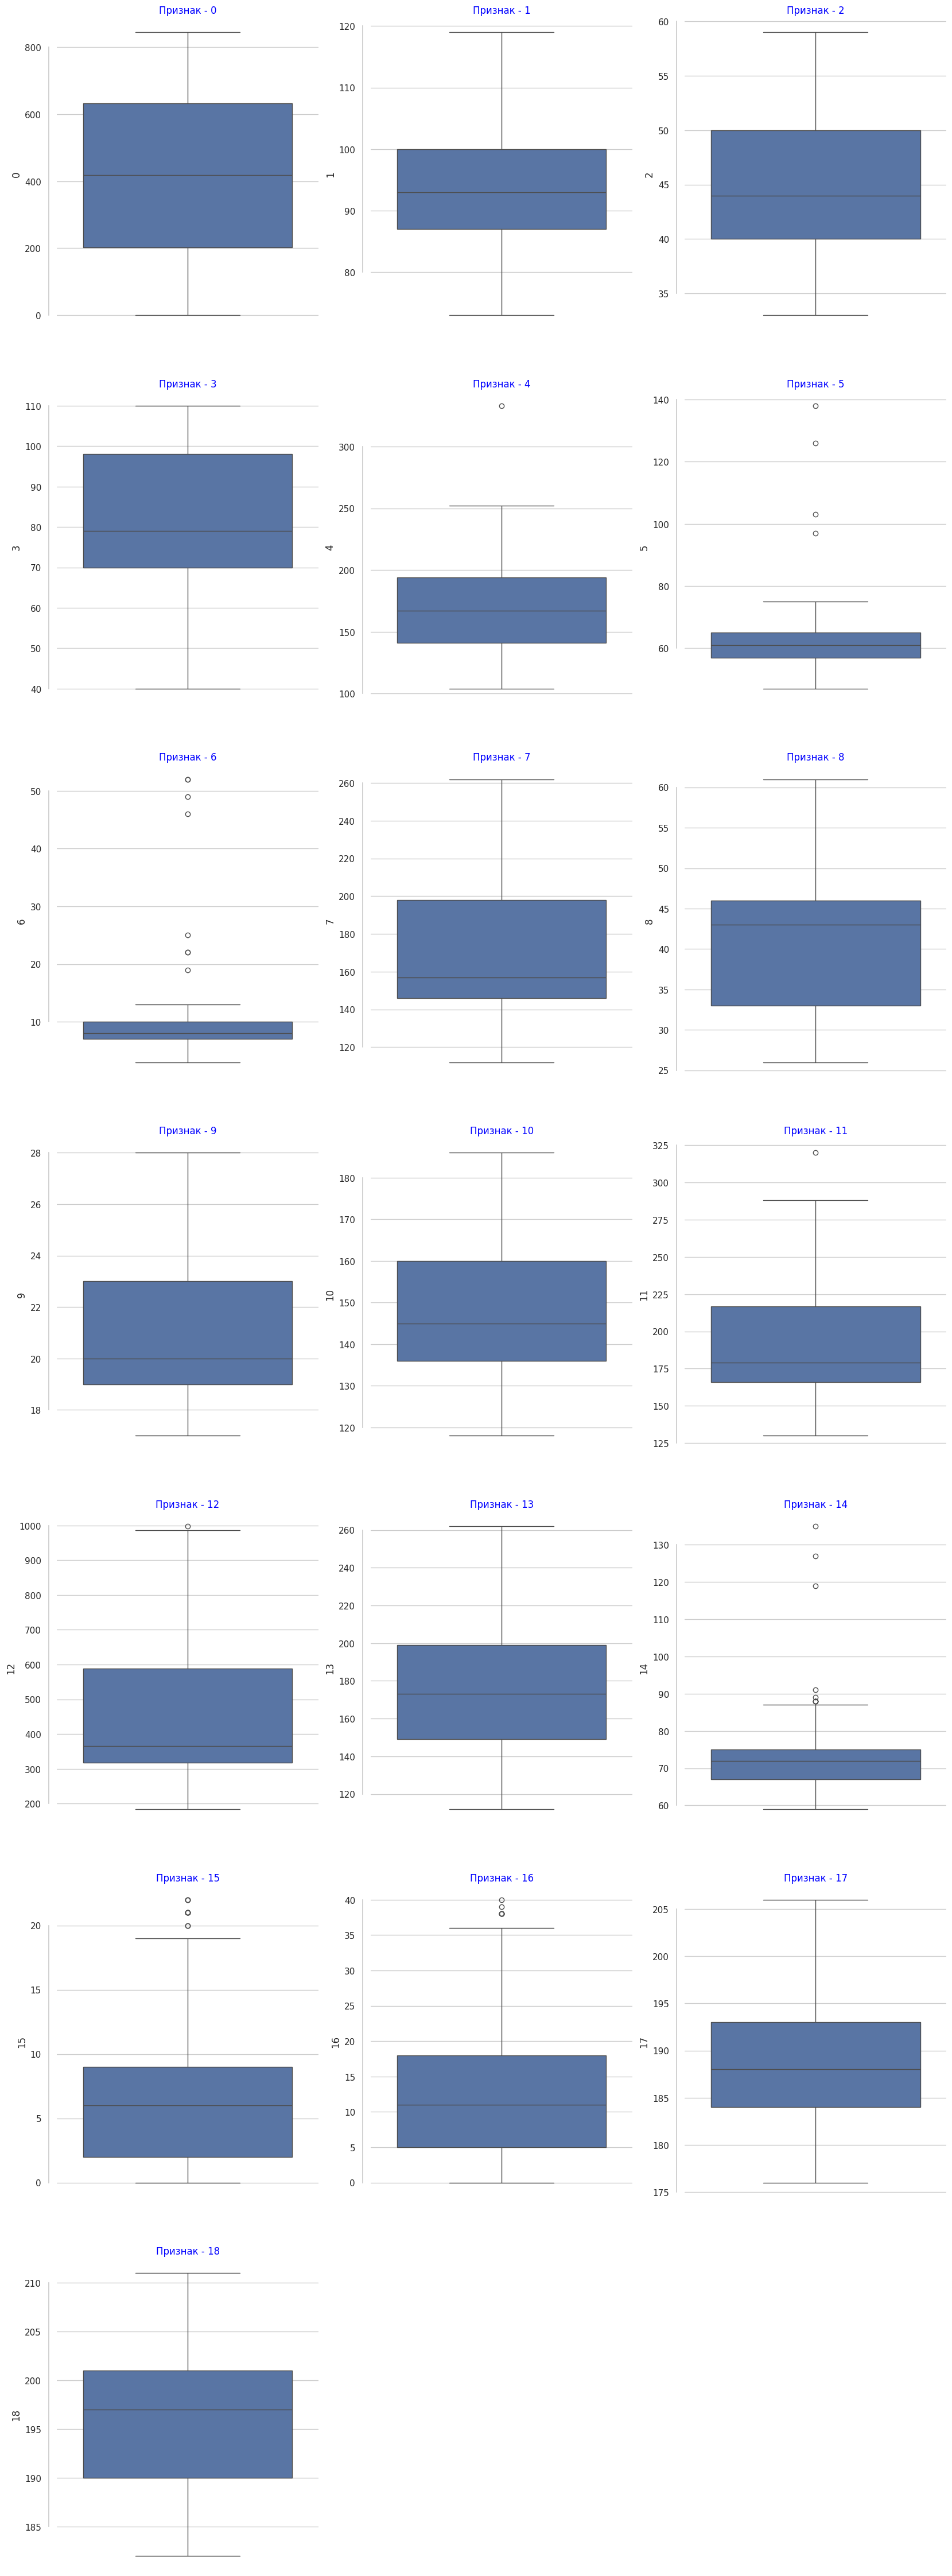

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,100))

for ind, col_name in enumerate(X_train_pd.columns):
  plt.subplot(12,3,ind+1)
  ax=sns.boxplot(
            y=col_name,
            data=X_train_pd,
            dodge=True

            )

  plt.title("Признак - "+str(col_name), fontdict={'fontsize':12, 'fontweight':'medium', 'color':'blue'})
sns.despine(offset=10, trim=True)

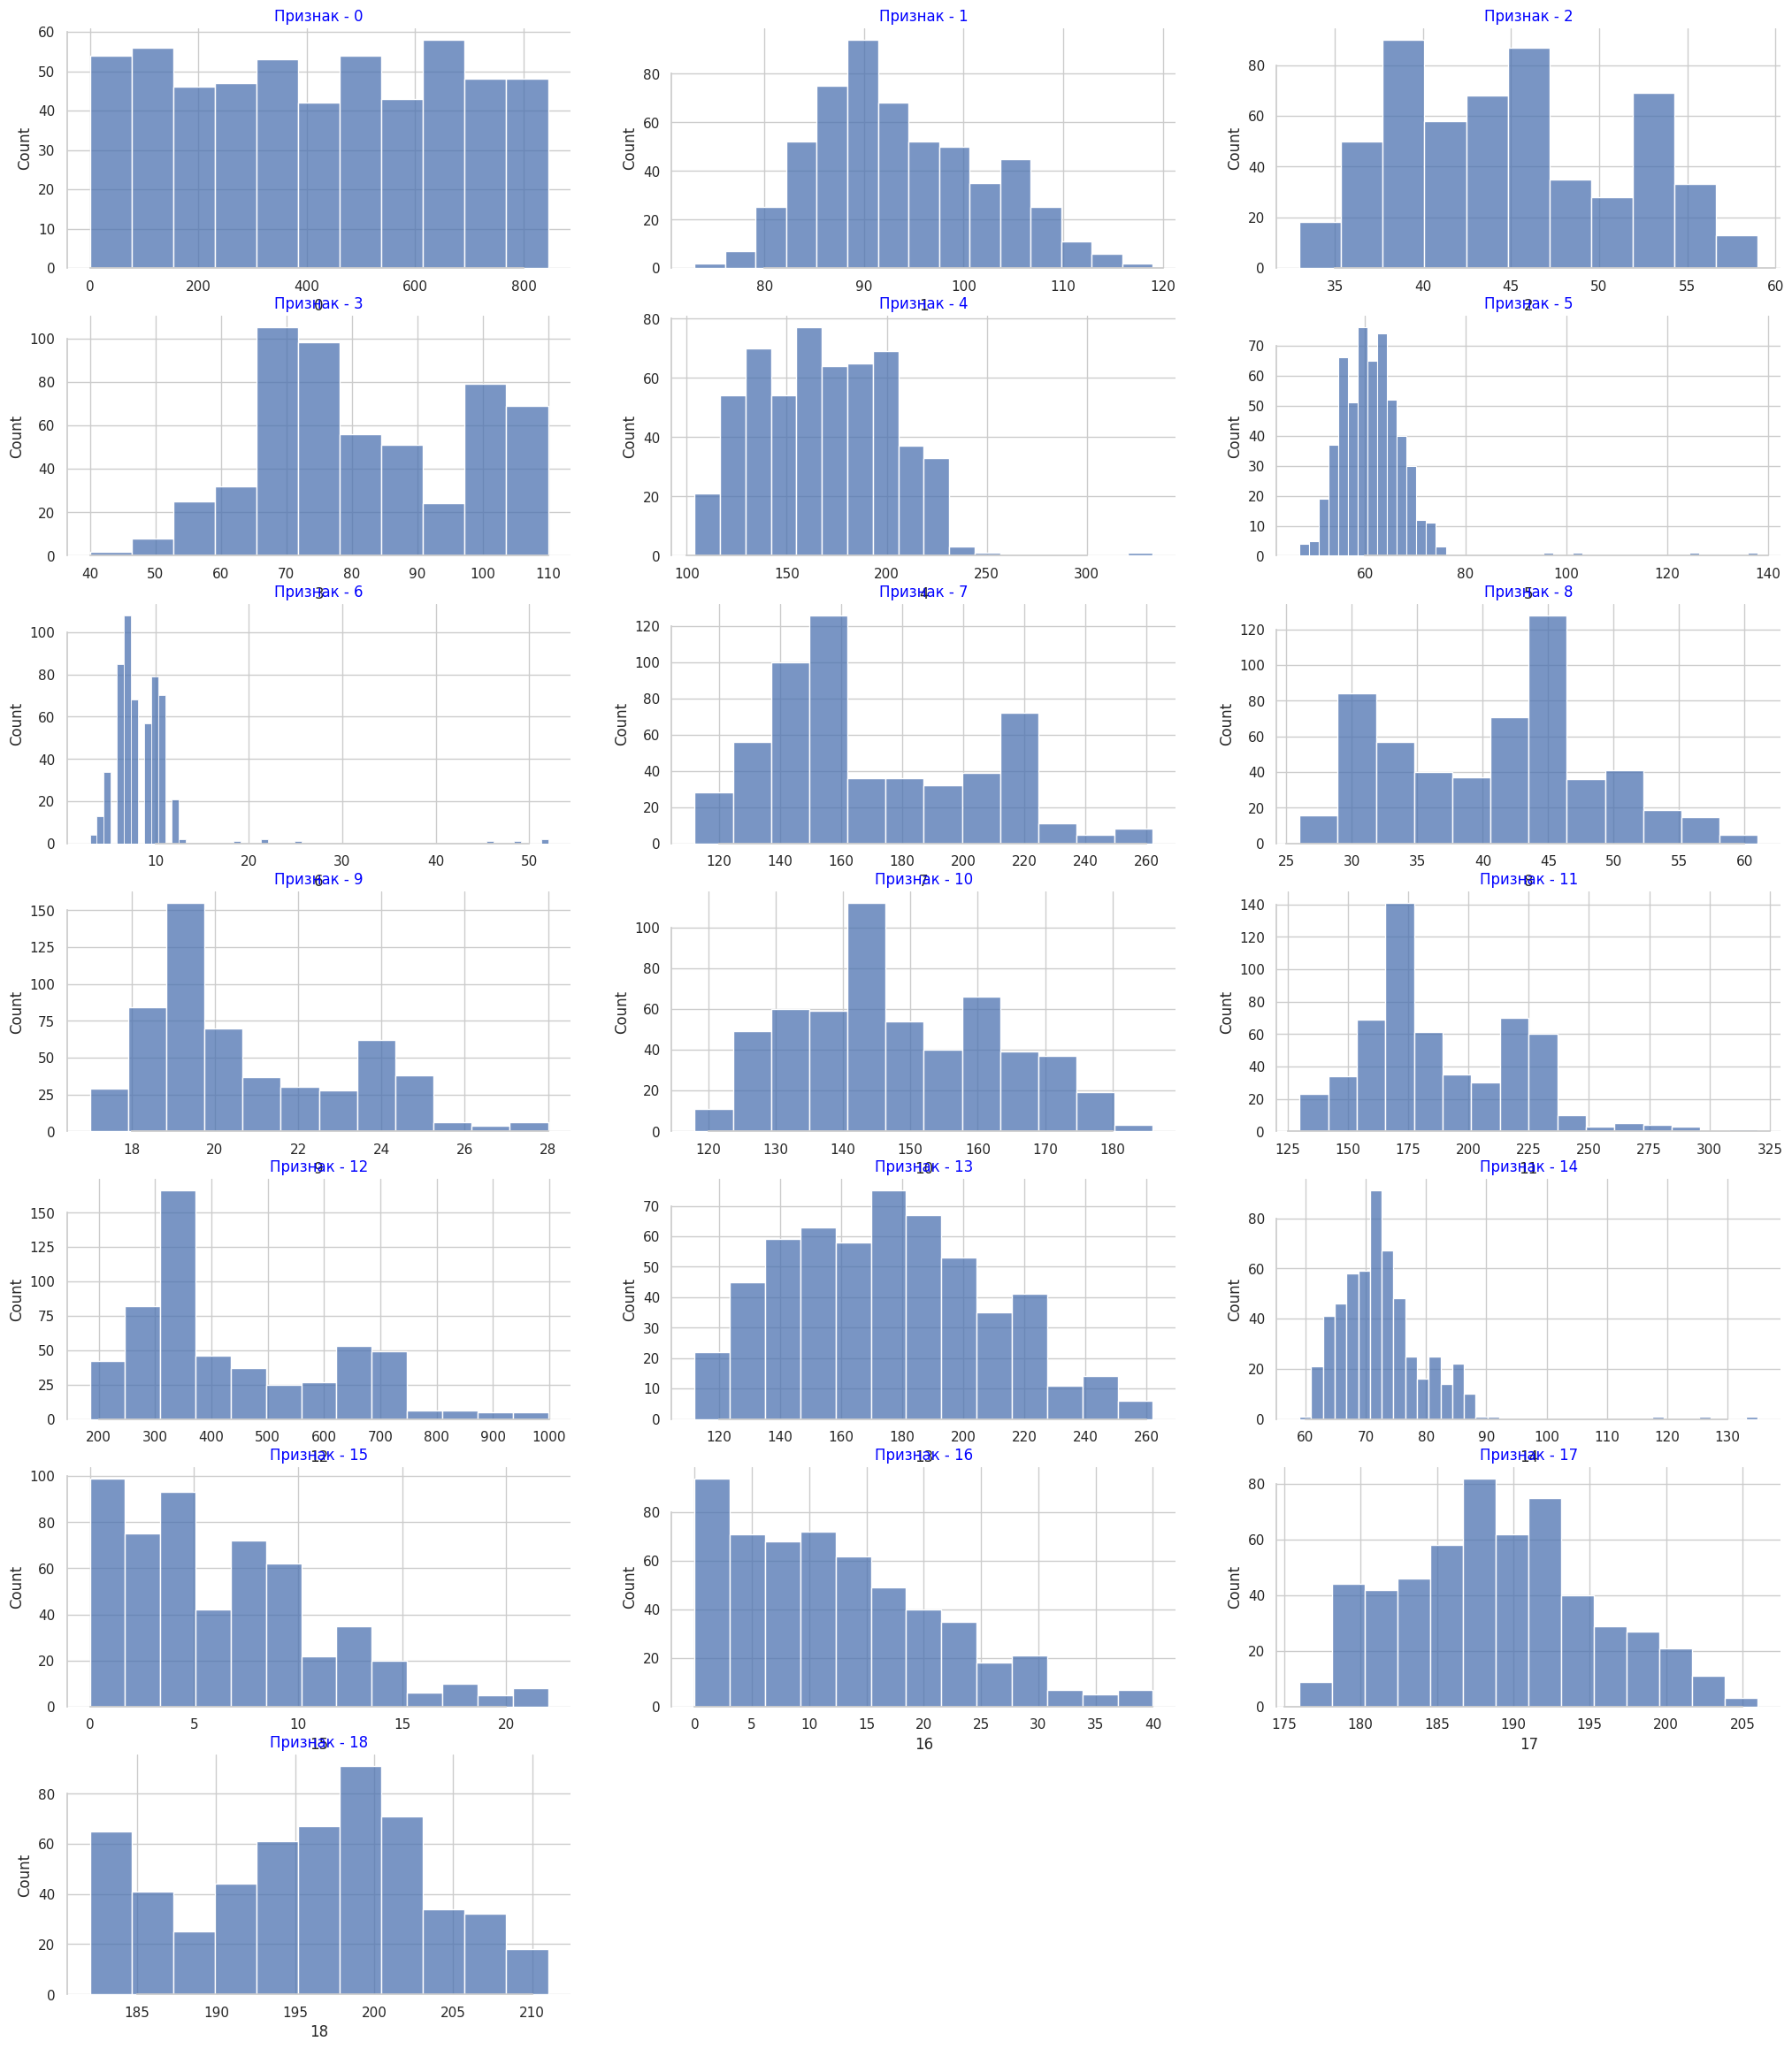

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(25,50))

for ind, col_name in enumerate(X_train_pd.columns):
    plt.subplot(12,3,ind+1).set_title(f'Признак {col_name}')
    ax=sns.histplot(x=col_name, data=X_train_pd)


    plt.title("Признак - "+str(col_name), fontdict={'fontsize':12, 'fontweight':'medium', 'color':'blue'})

sns.despine(offset=0, trim=True);

По гистограммам и ящикам с усами можно видиеть, что выбросов достаточно. Предварительно не убираем их так как, есть вероятность, что это не выбросы, а особенности

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
# Масштабирование числовых признаков
scaler = StandardScaler()
X_train_scaled = X_train_pd.copy()
X_train_scaled[X_train_pd.columns] = scaler.fit_transform(X_train_pd)
# Просмотр первых строк преобразованных данных
print(X_train_scaled.head())

         0         1         2         3         4         5         6   \
0 -0.200679 -1.412891 -1.266651 -1.434400 -1.058582  0.199893 -0.356356   
1  1.061628 -0.569371 -0.624554 -0.371244  0.443523  1.553052 -0.356356   
2 -1.341610  1.961190  2.104360  1.504912  0.351558 -1.423898 -0.589537   
3  0.899794  1.720184  1.622787  1.442374  1.884319  0.876472  0.576370   
4 -0.742824  0.756161  1.141214  1.379835  0.627455 -0.341371  0.343189   

         7         8         9         10        11        12        13  \
0 -1.011427  1.274610 -0.994106 -1.348426 -1.189121 -0.991537 -0.972397   
1 -0.353378  0.132247 -0.609494 -0.807825 -0.237801 -0.377676 -0.666415   
2  2.757397 -1.898621  2.852011  1.557306  2.838133  3.142167  2.515791   
3  1.471211 -1.390904  1.313564  1.557306  1.252600  1.514592  1.077679   
4  1.172098 -1.137045  1.313564  1.016705  0.998915  1.137265  0.679903   

         14        15        16        17        18  
0  1.264576  0.930644  1.293135 -1.586420 -1

Text(0.5, 1.0, 'Ящики с усами на одной диаграмме после нормализации')

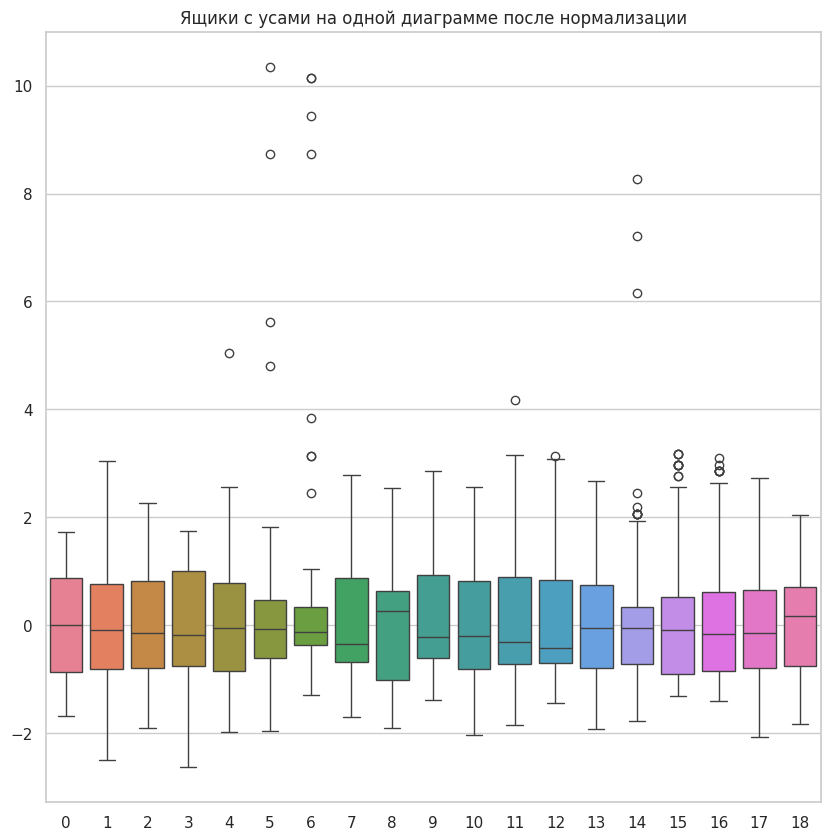

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(X_train_scaled).set_title('Ящики с усами на одной диаграмме после нормализации')

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Определяем модель логистической регрессии
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Определяем сетку гиперпараметров для поиска
param_grid = {
    'C': [0.1, 1, 10, 100],  # Регуляризация
    'penalty': ['l1', 'l2']  # Тип регуляризации
}

# Настраиваем кросс-валидацию с GridSearchCV
grid_search_lr = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
# Используем модель с лучшими гиперпараметрами из GridSearchCV
best_logreg = grid_search_lr.best_estimator_
# Масштабируем тестовые данные
X_test_scaled = scaler.transform(X_test)
# Прогнозируем на тестовой выборке игреки и их вероятности
y_pred = best_logreg.predict(X_test_scaled)
y_pred_proba = best_logreg.predict_proba(X_test_scaled)
# Оценка качества модели
# Оценка качества модели (accuracy и F1)
accuracy = accuracy_score(y_test, y_pred)
optimal_params_lr = grid_search_lr.best_params_
f1 = f1_score(y_test, y_pred, average='weighted') #вычисляется F1-оценка с использованием взвешенного среднего для многоклассовых данных
print("Лучшие параметры:", optimal_params_lr)
print("Точность", accuracy)
print("F1:", f1)

Лучшие параметры: {'C': 10, 'penalty': 'l1'}
Точность 0.7744107744107744
F1: 0.7719351446144869


In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead
#! pip install scikit-plot


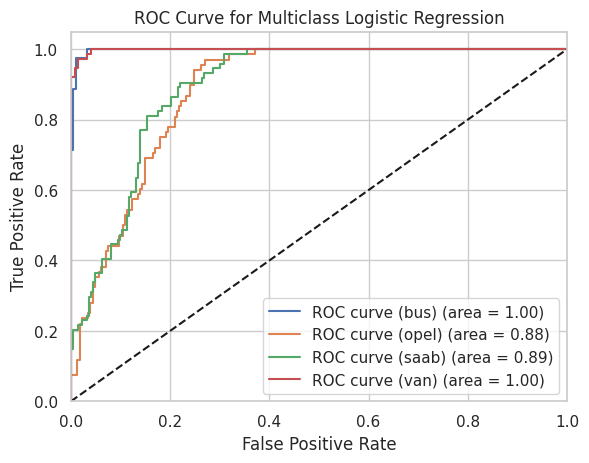

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Бинаризация меток классов для многоклассового случая
class_names = np.unique(y_test)
n_classes = len(class_names)
y_test_binarized = label_binarize(y_test, classes=class_names)

# Построение ROC-кривой для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение всех ROC-кривых
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve ({class_names[i]}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Криввые близки к верхнему левому углу точ есть моедль хорошо разделяет классы, у нее высокий TPR  при низком FPR Площадь под кривой близка к 1 что говорит о высоком качестве модели

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

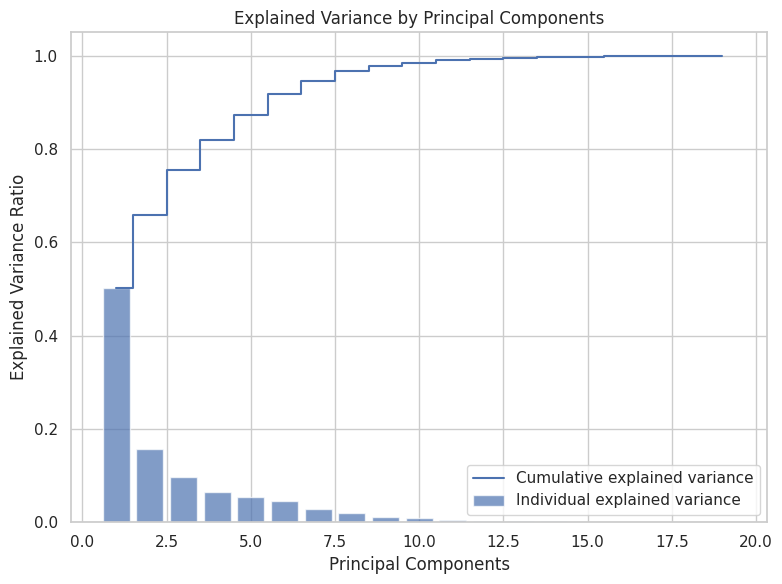

In [ ]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

# Применяем PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Получаем долю объяснённой дисперсии для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_

# Строим график объяснённой дисперсии
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(np.cumsum(explained_variance_ratio)) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

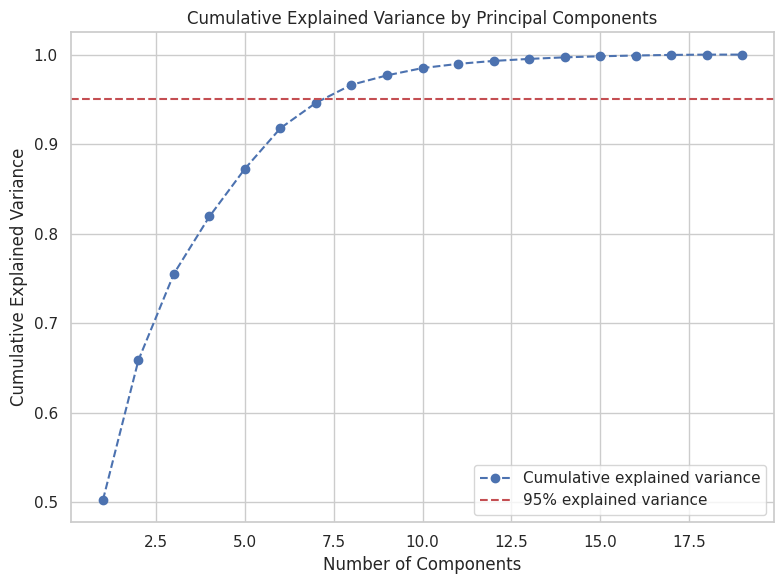

In [ ]:
### YOUR CODE HERE
# Применяем PCA к тренировочным данным
pca = PCA()
pca.fit(X_train_scaled)
# Кумулятивная объяснённая дисперсия
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# Строим график кумулятивной объяснённой дисперсии
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
# Выбор числа компонент: например, если кумулятивная доля объяснённой дисперсии > 95% на n компонентах, данные, разумеется, должны быть стандартизированны
n_components = 8 #видно что 8 компонент объясняют большую часть дисперсии
# Применяем PCA с выбранным числом компонент
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Лучшие параметры: {'C': 1, 'penalty': 'l1'}
Accuracy (Точность): 0.6296296296296297
F1 Score: 0.6176775798235493


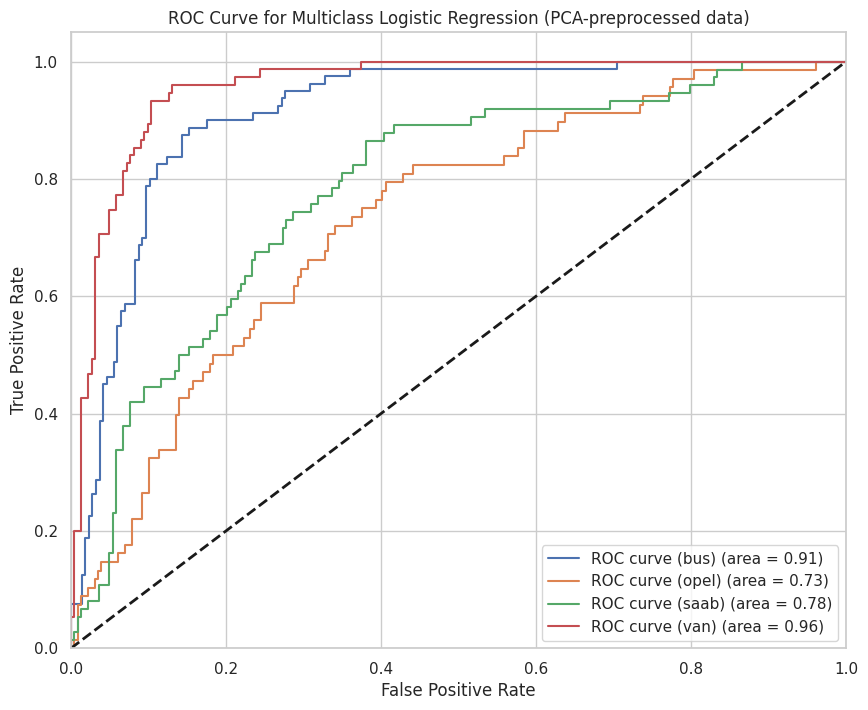

In [ ]:
### YOUR CODE HERE
# Кросс-валидация с GridSearchCV для поиска лучших гиперпараметров
grid_search_pca = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search_pca.fit(X_train_pca, y_train)
# Получаем лучшие гиперпараметры
best_logreg = grid_search_pca.best_estimator_
# Прогнозируем на тестовой выборке
y_pred = best_logreg.predict(X_test_pca)
y_pred_proba = best_logreg.predict_proba(X_test_pca)
# Оценка качества модели (точность и F1-метрика)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Для многоклассовой классификации используем 'weighted'
print("Лучшие параметры:", grid_search_pca.best_params_)
print("Accuracy (Точность):", accuracy)
print("F1 Score:", f1)
# Построение ROC-кривой с использованием scikitplot
# Бинаризация меток классов для многоклассового случая
class_names = np.unique(y_test)
n_classes = len(class_names)
y_test_binarized = label_binarize(y_test, classes=class_names)

# Построение ROC-кривой для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение всех ROC-кривых
# Бинаризуем метки классов
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Построение ROC-кривой для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Строим все ROC-кривые
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve ({class_names[i]}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression (PCA-preprocessed data)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Видно, что предсказательная точность ухудшилась, однако все равно на приемлемом уровне

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Лучшие параметры: {'max_depth': 5}
Accuracy (Точность): 0.7205387205387206
F1 Score: 0.6941738834756345


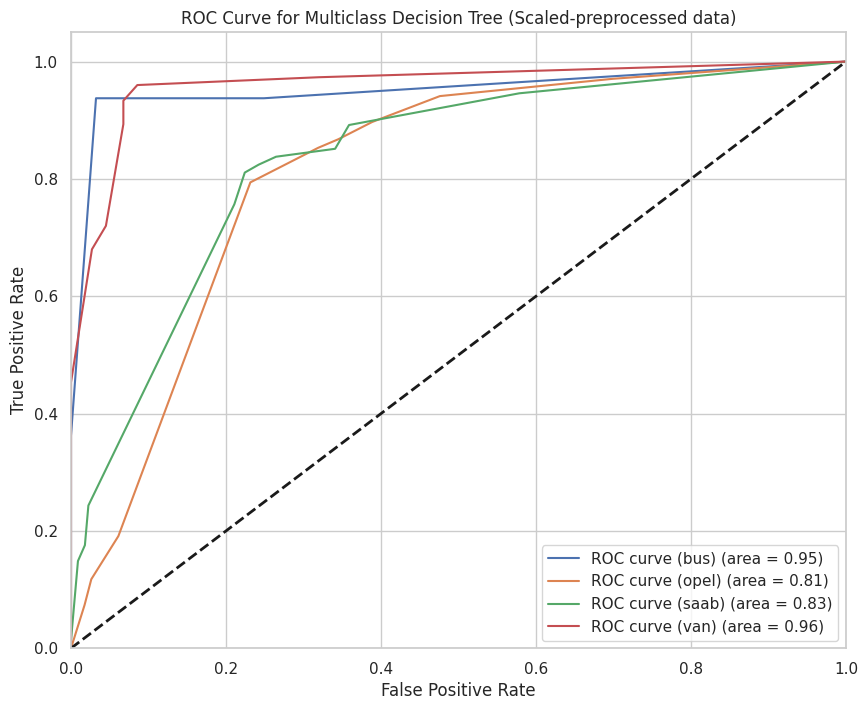

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
# Определяем модель дерева решений
tree = DecisionTreeClassifier()

# Сетка гиперпараметров для поиска
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20]  # Глубина дерева
}

# Кросс-валидация с GridSearchCV для поиска лучших гиперпараметров
grid_search_dt = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_scaled, y_train)

# Получаем лучшие гиперпараметры
best_tree = grid_search_dt.best_estimator_

# Прогнозируем на тестовой выборке
y_pred_t = best_tree.predict(X_test_scaled)
y_pred_proba_t = best_tree.predict_proba(X_test_scaled)

# Оценка качества модели (точность и F1-метрика)
accuracy = accuracy_score(y_test, y_pred_t)
f1 = f1_score(y_test, y_pred_t, average='weighted')  # Для многоклассовой классификации используем 'weighted'
optimal_params_dt = grid_search_dt.best_params_
print("Лучшие параметры:", optimal_params_dt)
print("Accuracy (Точность):", accuracy)
print("F1 Score:", f1)

# Построение ROC-кривой для многоклассовой классификации

# Бинаризуем метки классов
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Построение ROC-кривой для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_t[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Строим все ROC-кривые
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve ({class_names[i]}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Decision Tree (Scaled-preprocessed data)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder

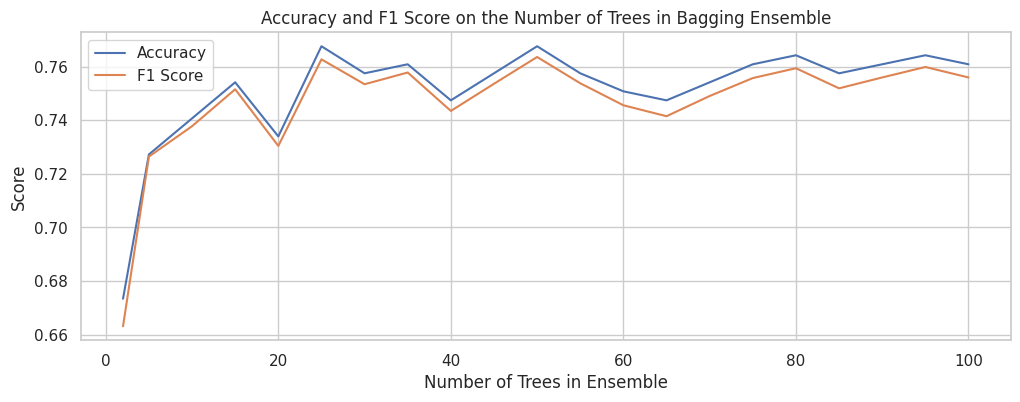

In [ ]:
#сначала поработаем с деревьями
# Параметры для ансамбля
ensemble_sizes = [2, *range(5, 101, 5)]
accuracy_scores_tr = []
f1_scores_tr = []
# Инициализация дерева решений и подбор оптимального гиперпараметра max_depth вне цикла
tree = DecisionTreeClassifier(random_state=SEED)
param_grid = {'max_depth': range(1, 51)}
tuned_tree = RandomizedSearchCV(tree, param_grid, random_state=SEED, n_jobs=-1, cv=10, scoring='accuracy')
tuned_tree.fit(X_train_scaled, y_train)
optimal_max_depth_t = tuned_tree.best_params_['max_depth']

# Основной цикл по количеству деревьев в ансамбле
for n_estimators in ensemble_sizes:
    # Инициализация дерева решений с оптимальной глубиной
    tree_model = DecisionTreeClassifier(max_depth=optimal_max_depth_t, random_state=SEED)

    # Построение ансамбля
    bagging_model = BaggingClassifier(estimator=tree_model, random_state=SEED, n_estimators=n_estimators, n_jobs=-1)
    bagging_model.fit(X_train_scaled, y_train)

    # Предсказание и вычисление метрик
    y_pred_bagging = bagging_model.predict(X_test_scaled)
    accuracy_scores_tr.append(accuracy_score(y_test, y_pred_bagging))
    f1_scores_tr.append(f1_score(y_test, y_pred_bagging, average="weighted"))

# Построение графиков метрик
plt.figure(figsize=(12, 4))
plt.plot(ensemble_sizes, accuracy_scores_tr, label='Accuracy')
plt.plot(ensemble_sizes, f1_scores_tr, label='F1 Score')
plt.title("Accuracy and F1 Score on the Number of Trees in Bagging Ensemble")
plt.xlabel("Number of Trees in Ensemble")
plt.ylabel("Score")
plt.legend(loc='best')
plt.grid(True)
plt.show()


Исходя из графика, с ростом числа деревьев, метрики возрастают то есть данные лучше обобщаются и предсказания становятся точнее. После достижения примерно 20-25деревьев наблюдается плато, производительность почти не меняется, дальше происходит, вероятно, из-за достижения избыточной сложности модели. Т.о. на практике оптимальное количество деревьев будет около 25.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


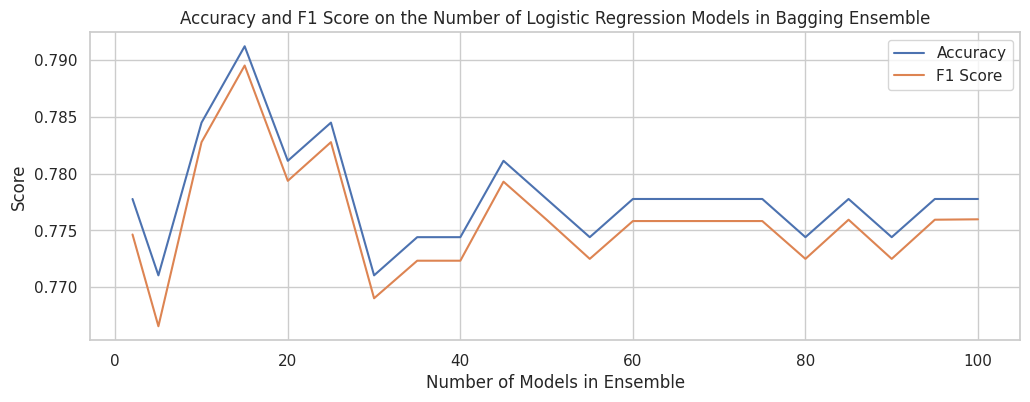

In [ ]:
#теперь с лог регрессией
accuracy_scores_lr = []
f1_scores_lr = []

# Инициализация логистической регрессии и подбор оптимального гиперпараметра C вне цикла
logistic_model = LogisticRegression(random_state=SEED, max_iter=500, solver='saga')
param_grid_lr = {
    'C': [0.1, 1, 10, 50],  # Регуляризация
    'penalty': ['l1', 'l2']  # Тип регуляризации
}  # Подбор параметра регуляризации
tuned_logistic = GridSearchCV(logistic_model, param_grid_lr, n_jobs=-1, cv=10, scoring='accuracy')
tuned_logistic.fit(X_train_scaled, y_train)
optimal_param = tuned_logistic.best_params_

# Основной цикл по количеству моделей в ансамбле
for n_estimators in ensemble_sizes:
    # Инициализация логистической регрессии с оптимальным C
    logistic_model = LogisticRegression(**optimal_param, random_state=SEED, max_iter=500, solver='saga')

    # Построение ансамбля методом Bagging
    bagging_model = BaggingClassifier(estimator=logistic_model, random_state=SEED, n_estimators=n_estimators, n_jobs=-1) #вопреки подсказке 1 тут будем исопльзовать автоматическое бутстреприование
    bagging_model.fit(X_train_scaled, y_train)

    # Предсказание и вычисление метрик
    y_pred_bagging_lr = bagging_model.predict(X_test_scaled)
    accuracy_scores_lr.append(accuracy_score(y_test, y_pred_bagging_lr))
    f1_scores_lr.append(f1_score(y_test, y_pred_bagging_lr, average="weighted"))

# Построение графиков метрик
plt.figure(figsize=(12, 4))
plt.plot(ensemble_sizes, accuracy_scores_lr, label='Accuracy')
plt.plot(ensemble_sizes, f1_scores_lr, label='F1 Score')
plt.title("Accuracy and F1 Score on the Number of Logistic Regression Models in Bagging Ensemble")
plt.xlabel("Number of Models in Ensemble")
plt.ylabel("Score")
plt.legend(loc='best')
plt.grid(True)
plt.show()

Тут метрики растут примерно до 15-20 моделей, затем наблюается уменьешние и плато. Поэтому оптимальное количество моделей которое я бы выбрал 20. Значение получилось сопоставимым с ансамблем деревьев.

Гиперпараметры для деревьев решений, которые были найдены в разделе 2.5, не обязательно оптимальны для деревьев, используемых в ансамбле потому, что в ансамблях деревья решений ведут себя иначе, чем одиночные деревья. Например, для одиночного дереваограничена глубина дерева, чтобы избежать переобучения. В ансамбле это не так критично.
Это же относится и к проблеме регуляризации. Поэтому для ансамблей требуется подбирать свои параметры.


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Лучшие параметры: {'max_depth': 9}


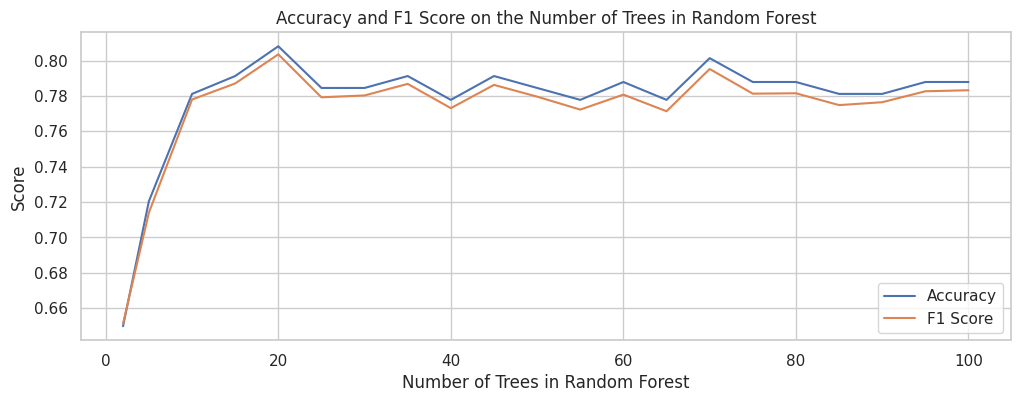

In [ ]:
accuracy_scores_rf = []
f1_scores_rf = []
# Инициализация случайного леса и подбор оптимального гиперпараметра max_depth вне цикла
forest = RandomForestClassifier(random_state=SEED)
param_grid_rf = {'max_depth': range(1, 51)}
tuned_forest = RandomizedSearchCV(forest, param_grid_rf, random_state=SEED, n_jobs=-1, cv=10, scoring='accuracy')
tuned_forest.fit(X_train_scaled, y_train)
optimal_max_depth_f = tuned_forest.best_params_['max_depth']
print("Лучшие параметры:", tuned_forest.best_params_)
# Основной цикл по количеству деревьев в ансамбле
for n_estimators in ensemble_sizes:
    # Инициализация случайного леса с оптимальными параметрами
    forest_model = RandomForestClassifier(max_depth=optimal_max_depth_f, n_estimators=n_estimators, random_state=SEED, n_jobs=-1)

    # Обучение случайного леса
    forest_model.fit(X_train_scaled, y_train)

    # Предсказание и вычисление метрик
    y_pred_rf = forest_model.predict(X_test_scaled)
    accuracy_scores_rf.append(accuracy_score(y_test, y_pred_rf))
    f1_scores_rf.append(f1_score(y_test, y_pred_rf, average="weighted"))

    # Построение графиков метрик
plt.figure(figsize=(12, 4))
plt.plot(ensemble_sizes, accuracy_scores_rf, label='Accuracy')
plt.plot(ensemble_sizes, f1_scores_rf, label='F1 Score')
plt.title("Accuracy and F1 Score on the Number of Trees in Random Forest")
plt.xlabel("Number of Trees in Random Forest")
plt.ylabel("Score")
plt.legend(loc='best')
plt.grid(True)
plt.show()

Метрики Accuracy и F1 Score значительно возрастают при увеличении числа деревьев до примерно 20 деревьев. После этого рост замедляется, и графики показывают незначительные флуктуации при дальнейшем увеличении числа деревьев. соответственно оптимальным выбираю 20 деревьев.

Сопоставляя с моделью ансамбля деревьев можно сделать вывод, что модель случайного леса чуть точнее (метрики при оптимальном числе деревьев выше) с чуть меньшим количеством моделей). При этом в целом результаты сопоставимы.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

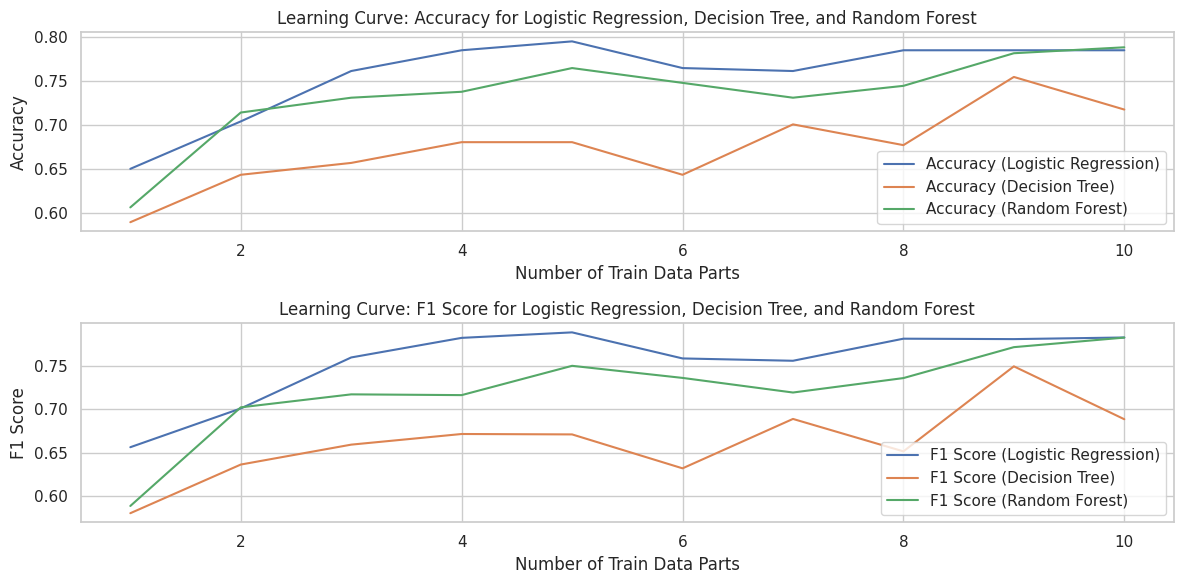

In [ ]:
X_train_parts = np.array_split(X_train_scaled, 10)
y_train_parts = np.array_split(y_train, 10)

# Оптимальные гиперпараметры для моделей
optimal_logistic_params = {'C': 10, 'penalty': 'l1'}
optimal_tree_params = {'max_depth': 5}
optimal_forest_params = {'max_depth': 9}

# Массивы для хранения результатов
train_sizes = np.arange(1, 11)
accuracy_scores_lr = []
f1_scores_lr = []
accuracy_scores_tree = []
f1_scores_tree = []
accuracy_scores_forest = []
f1_scores_forest = []
# Основной цикл по количеству частей обучающего набора
for i in range(1, 11):
    # Объединяем первые i частей для обучения
    X_train_subset = np.vstack(X_train_parts[:i])
    y_train_subset = np.hstack(y_train_parts[:i])

    # Логистическая регрессия
    logistic_model = LogisticRegression(**optimal_logistic_params, random_state=SEED, max_iter=500, solver='saga')
    logistic_model.fit(X_train_subset, y_train_subset)
    y_pred_lr = logistic_model.predict(X_test_scaled)
    accuracy_scores_lr.append(accuracy_score(y_test, y_pred_lr))
    f1_scores_lr.append(f1_score(y_test, y_pred_lr, average="weighted"))

    # Дерево решений
    tree_model = DecisionTreeClassifier(**optimal_tree_params, random_state=SEED)
    tree_model.fit(X_train_subset, y_train_subset)
    y_pred_tree = tree_model.predict(X_test_scaled)
    accuracy_scores_tree.append(accuracy_score(y_test, y_pred_tree))
    f1_scores_tree.append(f1_score(y_test, y_pred_tree, average="weighted"))

    # Случайный лес
    forest_model = RandomForestClassifier(**optimal_forest_params, random_state=SEED, n_jobs=-1)
    forest_model.fit(X_train_subset, y_train_subset)
    y_pred_forest = forest_model.predict(X_test_scaled)
    accuracy_scores_forest.append(accuracy_score(y_test, y_pred_forest))
    f1_scores_forest.append(f1_score(y_test, y_pred_forest, average="weighted"))

# Построение графиков
plt.figure(figsize=(12, 6))

# График для точности (Accuracy)
plt.subplot(2, 1, 1)
plt.plot(train_sizes, accuracy_scores_lr, label='Accuracy (Logistic Regression)')
plt.plot(train_sizes, accuracy_scores_tree, label='Accuracy (Decision Tree)')
plt.plot(train_sizes, accuracy_scores_forest, label='Accuracy (Random Forest)')
plt.xlabel("Number of Train Data Parts")
plt.ylabel("Accuracy")
plt.title("Learning Curve: Accuracy for Logistic Regression, Decision Tree, and Random Forest")
plt.legend(loc='best')
plt.grid(True)

# График для F1 Score
plt.subplot(2, 1, 2)
plt.plot(train_sizes, f1_scores_lr, label='F1 Score (Logistic Regression)' )
plt.plot(train_sizes, f1_scores_tree, label='F1 Score (Decision Tree)')
plt.plot(train_sizes, f1_scores_forest, label='F1 Score (Random Forest)')
plt.xlabel("Number of Train Data Parts")
plt.ylabel("F1 Score")
plt.title("Learning Curve: F1 Score for Logistic Regression, Decision Tree, and Random Forest")
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

Анализируя графики можно сделать выводы

1. Метрики логрегресси растут примерно до 5 частей Модель эффективная на небольшом наборе данных

2. Дерево решений улучшает метрики до примерно 5 частей, после чего точность растет не так эффективно вероятно происходит переобучение. Этот мтеод оказался наименее надежным

3. Случайный лес устойчиво растет

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
from catboost import CatBoostClassifier
#from xgboost import XGBClassifier

In [ ]:
# Определение диапазона гиперпараметров для GridSearchCV
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}
catboost_model = CatBoostClassifier(random_seed=42, silent=True)
grid_search_cat = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_cat.fit(X_train_scaled, y_train)
best_catboost = grid_search_cat.best_estimator_
optimal_params_cat = grid_search_cat.best_params_
print("Лучшие параметры CatBoost:", optimal_params_cat)

Лучшие параметры CatBoost: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}


Точность (CatBoost): 0.7575757575757576
F1 Score (CatBoost): 0.7513844024951442


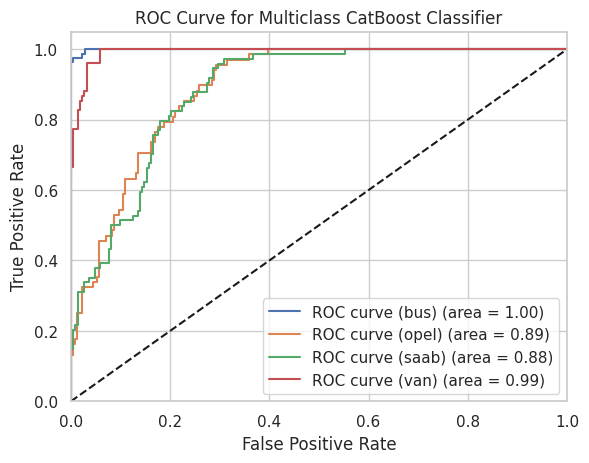

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = best_catboost.predict(X_test_scaled)
y_pred_proba = best_catboost.predict_proba(X_test_scaled)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Точность (CatBoost):", accuracy)
print("F1 Score (CatBoost):", f1)

# Бинаризация меток классов для многоклассового случая
class_names = np.unique(y_test)
n_classes = len(class_names)
y_test_binarized = label_binarize(y_test, classes=class_names)

# Построение ROC-кривой для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение всех ROC-кривых
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve ({class_names[i]}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass CatBoost Classifier')
plt.legend(loc="lower right")
plt.show()

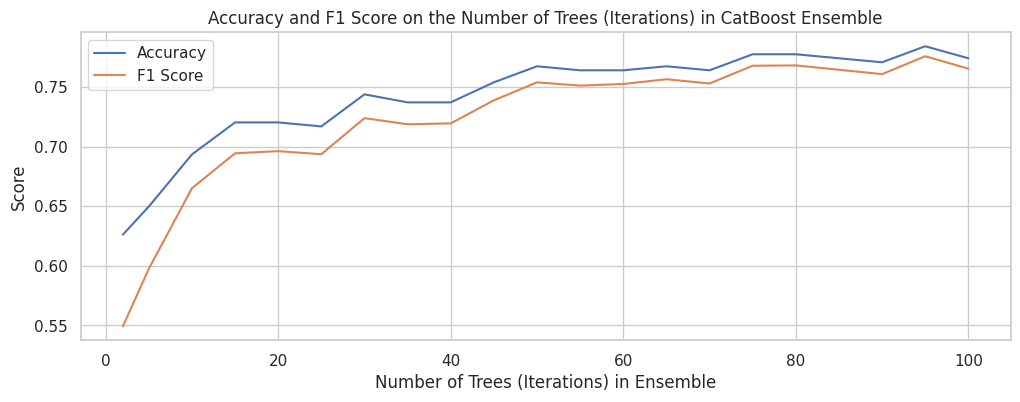

In [ ]:
accuracy_scores_cat = []
f1_scores_cat = []

# Основной цикл по количеству деревьев (итераций) в CatBoost
for n_estimators in ensemble_sizes:
    # Инициализация модели CatBoost с оптимальными гиперпараметрами
    catboost_model = CatBoostClassifier(
        iterations=n_estimators,
        learning_rate=optimal_params_cat['learning_rate'],
        depth=optimal_params_cat['depth'],
        random_seed=42,
        silent=True
    )

    # Обучение модели CatBoost
    catboost_model.fit(X_train_scaled, y_train)

    # Прогнозирование на тестовых данных и вычисление метрик
    y_pred_catboost = catboost_model.predict(X_test_scaled)
    accuracy_scores_cat.append(accuracy_score(y_test, y_pred_catboost))
    f1_scores_cat.append(f1_score(y_test, y_pred_catboost, average="weighted"))

# Построение графиков метрик
plt.figure(figsize=(12, 4))

# График для точности (Accuracy)
plt.plot(ensemble_sizes, accuracy_scores_cat, label='Accuracy')
plt.plot(ensemble_sizes, f1_scores_cat, label='F1 Score')
plt.title("Accuracy and F1 Score on the Number of Trees (Iterations) in CatBoost Ensemble")
plt.xlabel("Number of Trees (Iterations) in Ensemble")
plt.ylabel("Score")
plt.legend(loc='best')
plt.grid(True)
plt.show()

Точность и F1 score увеличиваются с ростом количества деревьев в ансамбле, но после определенного момента рост замедляется и практически стабилизируется на 60-80 деревьев. То есть дальнейшее увеличение неэффективно. незначительное снижение после 90 деревьев, быть может, связано с переобучением. Т.о. оптимальным количеством деревьев в ансамбле 60-80.